(Placeholder for your group #)

(Placeholder for your names)
Ingrid Salvador Maldonado, Miriam Espinosa Solana
(Placeholder for your i-numbers)
i6314966, i6320314

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 2

By completing and delivering the clinic tasks you will know how to :

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple logistic regression analysis;
- Evaluate classification models based on different metrics;
- Assess how your model performance can improve
- Reflect on the greater impact of the models you develop

---

## Important Dates

- Homework release: Fri, 7th Feb
- **Homework due**: Mon, 17th Feb late night (wildcards possible, apply to the group)

---

##  Some rules

* We have provided `TODO` comments in the code cells that you need to fill out with your solutions. For some questions, we have also provided `Your response` comments, where you should provide a textual answer.

* You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.



---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing (20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: The Aftermath (5 points)

## Context

Within DACS, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in the Netherlands !

Your mentor at the company Jerasimosu, has explained to you that the company is interested in a pricing model for used cars. 

- Jerasimosu: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Jerasimosu: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3

You should not use any other data source for this homework.

For some questions, you might need to slightly modify the data. But overall, you should avoid making any major changes to the data, which may affect your analysis.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [2]:
#TODO

import pandas as pd

# Load datatset
file_path = './data/Task1-2.ToyotaCorolla-raw.csv'

# Read file and store lines
with open(file_path, "r") as f:
    lines = f.readlines()

# Cleaning dataset
cleaned_lines = []
for line in lines:
    # Remove " " present in lines
    line = line.replace('"','')
    line = line.replace('£', '')
    categories = line.strip().split(",")
    
    if len(categories) == 12:
        categories[0] = categories[0] + categories[1]
        del categories[1]
    
    elif  len(categories) == 13:
        categories[0] = categories[0] + categories[1]
        #print(categories)
        categories[0] = categories[0] + '.' + categories[2]
        #print(categories)
        #print(categories[1])
        #print(categories[2])
        del categories[1]
        del categories[1]
        
    
    if len(categories) == 11:
        cleaned_lines.append(",".join(categories))

cleaned_file_path = './data/Task1-2.ToyotaCorolla-cleaned.csv'

with open(cleaned_file_path, "w") as f:
    f.write("\n".join(cleaned_lines))

df = pd.read_csv(cleaned_file_path)
df.head(5)



,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [3]:
#TODO

# Check Nan values per column
nan_checked = df.isna().any()
print(nan_checked)

# Check Nan values per row
#nan_checked = df.isna().any(axis=1)
#print(rows_with_nan)





Price        False
Age          False
Mileage      False
FuelType     False
HP           False
MetColor     False
Automatic    False
CC           False
Doors        False
Weight       False
Currency     False
dtype: bool


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

- Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.

Hint: Is all values in the `Price` column numerical?


In [4]:
#TODO
df_mean = df['Price'].mean()
print(df_mean)

df_median = df['Price'].median()
print(df_median)


9440.213683077993
8595.0


**1.4 (4 pts): Convert Units**

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to EUR and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 EUR
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in CHF or GBP to EUR, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [5]:
#TODO
def convert_price(row):
    if row['Currency'] == 'CHF':
        return round(row['Price']*1.05)
    elif row['Currency'] == 'GBP':
        return round(row['Price']*1.15)
    else:
        return row['Price']


def convert_distance(row):
    try:
        if row['Currency'] == 'GBP':
            return round(row['Mileage'] * 1.61)  # Convert miles to kilometers
        else:
            return row['Mileage']
    except Exception as e:
        print(f"Error processing row for Distance conversion: {row}")
        print(f"Error: {e}")

df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = df.apply(convert_price, axis=1)
df['Mileage'] = df.apply(convert_distance, axis=1)
df.drop(columns=['Currency'], inplace=True)

# Calculations for 'Price'
price_min = df['Price'].min()
price_mean = df['Price'].mean()
price_median = df['Price'].median()
price_max = df['Price'].max()
print(f"Min: {price_min}")
print(f"Mean: {price_mean}")
print(f"Median: {price_median}")
print(f"Max: {price_max}")

# Calculations for 'Distance
distance_min = df['Mileage'].min()
distance_mean = df['Mileage'].mean()
distance_median = df['Mileage'].median()
distance_max = df['Mileage'].max()
print("\nDistance Statistics:")
print(f"Min: {distance_min}")
print(f"Mean: {distance_mean}")
print(f"Median: {distance_median}")
print(f"Max: {distance_max}")

Min: 3946.0
Mean: 9880.043871866295
Median: 9025.0
Max: 29478.0

Distance Statistics:
Min: 1.0
Mean: 68540.10662020906
Median: 63451.0
Max: 243000.0


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [6]:
#TODO

# A
df_fuel_type = df.groupby('FuelType')['Price'].mean()
print(df_fuel_type)

# B
df_doors = df.groupby('Doors')['Price'].mean()
print(df_doors)

FuelType
CNG        8752.176471
Diesel    10366.490323
Petrol     9835.561709
Name: Price, dtype: float64
Doors
2     7347.000000
3     9321.051447
4     9024.297101
5    10578.637982
Name: Price, dtype: float64


- A. Diesel has the highest average price
- B. 5 doors has the highest average price

**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

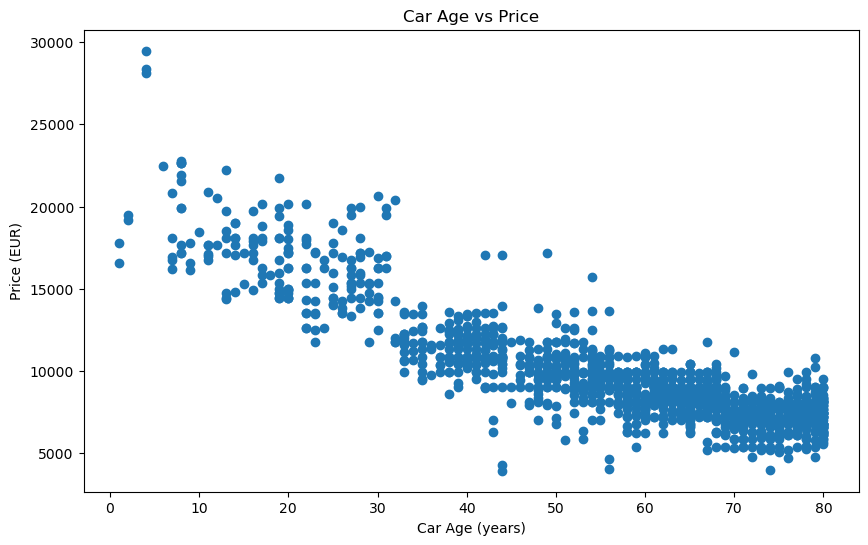

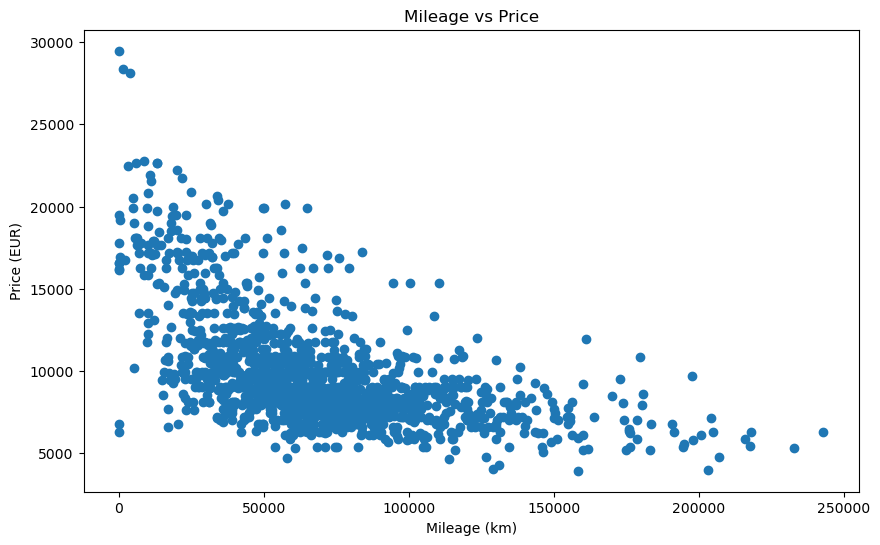

In [7]:
#TODO

# Scatter plot: Car Age vs Price
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(df['Age'],df['Price'])  # Add alpha for dots transparency??
ax1.set_title('Car Age vs Price')
ax1.set_xlabel('Car Age (years)')
ax1.set_ylabel('Price (EUR)')
plt.show()

# Scatter plot: Mileage vs Price
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(df['Mileage'],df['Price'])
ax2.set_title('Mileage vs Price')
ax2.set_xlabel('Mileage (km)')
ax2.set_ylabel('Price (EUR)')
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [8]:
#TODO

# Pearson correlation
pearson = df['Price'].corr(df['Mileage'], method='pearson')

# Spearman correlation
spearman = df['Price'].corr(df['Mileage'], method='spearman')

print(f"Pearson correlation: {pearson}")
print(f"Spearman correlation: {spearman}")


Pearson correlation: -0.5650134877355832
Spearman correlation: -0.6063895382653919



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Your Response:

//**//

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building the linear regression model, you need to implement some helper functions.

 Implement the `accuracy` , `precision`, `recall` and `f1_score` functions. 

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

- Compare the results with the implementation in `sklearn` and see if they match.

In [9]:
#TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Our own functions
def accuracy(true_labels, predicted_labels):
    return np.mean(true_labels == predicted_labels)

def precision(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score_custom(true_labels, predicted_labels):
    p = precision(true_labels, predicted_labels)
    r = recall(true_labels, predicted_labels)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0


true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])


manual_accuracy = accuracy(true_labels, predicted_labels)
manual_precision = precision(true_labels, predicted_labels)
manual_recall = recall(true_labels, predicted_labels)
manual_f1 = f1_score_custom(true_labels, predicted_labels)

#metrics with sklearn
sklearn_accuracy = accuracy_score(true_labels, predicted_labels)
sklearn_precision = precision_score(true_labels, predicted_labels)
sklearn_recall = recall_score(true_labels, predicted_labels)
sklearn_f1 = f1_score(true_labels, predicted_labels)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Manual Metrics:")
print(f"Accuracy: {manual_accuracy}")
print(f"Precision: {manual_precision}")
print(f"Recall: {manual_recall}")
print(f"F1 Score: {manual_f1}")

print("\nSklearn Metrics:")
print(f"Accuracy: {sklearn_accuracy}")
print(f"Precision: {sklearn_precision}")
print(f"Recall: {sklearn_recall}")
print(f"F1 Score: {sklearn_f1}")

print("\nConfusion Matrix:")
print(conf_matrix)


Manual Metrics:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272

Sklearn Metrics:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727273

Confusion Matrix:
[[3 2]
 [1 4]]



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [10]:
#TODO
df_encoded = pd.get_dummies(df, drop_first=True)  # to avoid multicollinearity

print(f"Number of columns after one-hot encoding: {df_encoded.shape[1]}")

Number of columns after one-hot encoding: 11


B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [11]:
#TODO
from sklearn.model_selection import train_test_split

#features and target variables
X = df_encoded.drop(columns=["Price"])  
y = df_encoded["Price"]

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 1148
Test samples: 288


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

Your Response:

Validation sets are typically used for hyperparameter tuning. Unlike model parameters, which are learned during training, hyperparameters are specified by the practitioner.
For standard linear regression, there are no hyperparameters to tune

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [12]:
#TODO
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#print(X_train.isna().sum())
X_train.fillna(X_train.mean(), inplace=True)

scaler = StandardScaler()

# Fit and transform while preserving column names
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Add constant column
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Ensure y_train and X_train_scaled have aligned indices
y_train = y_train.loc[X_train_scaled.index]


print(f"Average: {X_train_scaled.mean(axis=0)}")
print(f"Standard: {X_train_scaled.std(axis=0)}")

print(f"Overall Mean: {X_train_scaled.mean()}")
print(f"Overall Standard Deviation: {X_train_scaled.std()}")

Average: const              1.000000e+00
Age               -4.951517e-17
Mileage            6.189397e-18
HP                -2.444812e-16
MetColor          -2.166289e-17
Automatic         -2.630494e-17
CC                 2.475759e-17
Doors             -3.961214e-16
Weight             9.462040e-16
FuelType_Diesel   -7.117806e-17
FuelType_Petrol   -2.119868e-16
dtype: float64
Standard: const              0.000000
Age                1.000436
Mileage            1.000436
HP                 1.000436
MetColor           1.000436
Automatic          1.000436
CC                 1.000436
Doors              1.000436
Weight             1.000436
FuelType_Diesel    1.000436
FuelType_Petrol    1.000436
dtype: float64
Overall Mean: const              1.000000e+00
Age               -4.951517e-17
Mileage            6.189397e-18
HP                -2.444812e-16
MetColor          -2.166289e-17
Automatic         -2.630494e-17
CC                 2.475759e-17
Doors             -3.961214e-16
Weight             9.

E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

Your Response:

The recommended approach is to normalize the data after splitting it into training and testing sets. To prevent any information leakage from the testing set into the training set, which can lead to over-optimistic results and unrealistic performance evaluations.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train a linear regression model using and evaluate its performance, follow these steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [13]:
#TODO

model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     665.6
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:43:35   Log-Likelihood:                -9838.3
No. Observations:                1148   AIC:                         1.970e+04
Df Residuals:                    1137   BIC:                         1.975e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9917.4739     37.823    2

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [14]:
#TODO
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 1468.3928032988117


Your Response:

RMSE is 1468.39. This means that, on average, the predicted car prices deviate from the actual prices by around 1468.39 euros. 



3. (2 pts) Report the R² score on the test dataset and interpret it.


In [15]:
#TODO
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
R2 = r2_score(y_test, y_pred)
print(f"R² Score: {R2}")

R² Score: 0.8216810971174678


Your Response:

The model captures a significant portion of the variation in the car prices, but there is still about 18% of variance that is not explained by the features.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [16]:
#TODO
significant_features = model.pvalues[model.pvalues < 0.05].index
print(f"Statistically significant 5% level: {significant_features.tolist()}")


sorted_coefficients = model.params.abs().sort_values(ascending=False)
top_two_features = sorted_coefficients.index[1:3] 
print(f"Top 2 features with highest coefficients: {top_two_features.tolist()}")
top_four_features = sorted_coefficients.index[1:5] 
print(f"Top 4 features with highest coefficients: {top_four_features.tolist()}")

Statistically significant 5% level: ['const', 'Age', 'Mileage', 'HP', 'CC', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']
Top 2 features with highest coefficients: ['Age', 'Weight']
Top 4 features with highest coefficients: ['Age', 'Weight', 'HP', 'Mileage']


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

Your Response:

Age and Weight have the strongest impact on the target variable.So a unit change in these features results in the largest change in the predicted car price, compared to other features.

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

Your Response:

Weight (1148.38)
Heavier vehicles, such as SUVs and trucks, tend to be more expensive.
The strong positive coefficient suggests that weight is an important predictor of car price.

Horsepower (HP) (527.86)
Cars with higher horsepower are generally more valuable. 
The positive coefficient confirms that powerful engines increase car price.

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Jerasimosu to discuss this issue. Indeed, Jerasimosu suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

Your Response:

Weight and fuel consumption are highly correlated and fuel consumption could be a confounding variable affecting car price. Other option could be the type of vehicle, since heavier vehicles, such as SUVs and trucks, tend to be more expensive.

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.

In [17]:
#TODO

X_train.fillna(X_train.mean(), inplace=True)

X_train["Inverse_Mileage"] = 1 / (X_train["Mileage"] )
X_test["Inverse_Mileage"] = 1 / (X_test["Mileage"] )

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

y_train = y_train.loc[X_train_scaled.index]

model_with_inverse_mileage = sm.OLS(y_train, X_train_scaled).fit()

print(model_with_inverse_mileage.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     606.3
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:43:35   Log-Likelihood:                -9836.8
No. Observations:                1148   AIC:                         1.970e+04
Df Residuals:                    1136   BIC:                         1.976e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9917.4739     37.791    2

Before adding the inverse mileage term, the coefficient for Mileage was around -500, meaning that for every additional unit increase in mileage, the car price dropped significantly.After introducing 1/Mileage, the new coefficient is -60, which means that the impact of mileage on price has decreased in magnitude, so there is a non-linear effect of mileage, where depreciation is steeper at lower mileage values and flattens at higher mileage values. 

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Jerasimosu is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [18]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
print(data_df.head())

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   sold_within_3_months  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  



**3.1 (2 pts): Preprocess the Data**
- （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [32]:
#TODO

# Count the occurrences of each unique value in the column
sales_counts = data_df['sold_within_3_months'].value_counts()

# Display the counts
print("Cars not sold within 3 months:", sales_counts[0])
print("Cars sold within 3 months:", sales_counts[1])


Cars not sold within 3 months: 556
Cars sold within 3 months: 880


- (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [36]:
# Check data types
print(data_df.dtypes)

Price                    int64
Age                      int64
KM                       int64
FuelType                object
HP                       int64
MetColor                 int64
Automatic                int64
CC                       int64
Doors                    int64
Weight                   int64
sold_within_3_months     int64
dtype: object


In [ ]:
#TODO

#Since fuelType is of type object and not int it is our categorical column
categorical_columns = ['FuelType']

# Apply one-hot encoding 
data_encoded = pd.get_dummies(data_df, columns=categorical_columns, drop_first=True)




**3.2 (20 pts):  Logistic Regression Model**
1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [55]:
#TODO

# Define the target variable
y = data_df['sold_within_3_months']

# Define the features (include all columns except the target)
#Since we are only dropping the target column, Price remains in the features. 
X = pd.get_dummies(X, drop_first=True)

2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [56]:
#TODO
# Split the data with 80-20 split and random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [ ]:
#TODO
scaler = StandardScaler()

# Fit and transform
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Add a constant column 
X_train_scaled = sm.add_constant(X_train_scaled)

X_test_scaled = sm.add_constant(X_test_scaled)

4. (2 pts) Fit a logistic regression model on the training dataset. Feel free to use either `statsmodels` or `sklearn`.

In [ ]:
#TODO

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model 
log_reg.fit(X_train_scaled, y_train)

# Display the model coefficients
print("Model Coefficients (sklearn):", log_reg.coef_)
print("Intercept (sklearn):", log_reg.intercept_)


Model Coefficients (sklearn): [[-0.03486651 -6.52168167  0.24342084 -0.07222644 -0.47681361  0.10241797
  -0.13281652  0.4359013  -0.07845163 -0.07231282 -0.50948356  0.02747141]]
Intercept (sklearn): [-0.07939021]


5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [ ]:
#TODO

y_pred = log_reg.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (sklearn): {accuracy}")

Accuracy (sklearn): 0.9270833333333334


6. (2 pts) Calculate the precision, recall, and F1-score.

In [ ]:
#TODO

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision (sklearn): {precision}")
print(f"Recall (sklearn): {recall}")
print(f"F1-score (sklearn): {f1}")

Precision (sklearn): 0.9273743016759777
Recall (sklearn): 0.9540229885057471
F1-score (sklearn): 0.9405099150141643


7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly, for example by running some offer (special discount on cars). But which ones? How should you adjust the threshold for the decision boundary of the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

Your Response:

//**//

We would decrease the threshold (Option B) 

By default, the threshold for logistic regression is usually set to 0.5. This means that if the predicted probability of a car being sold is greater than or equal to 0.5, the model predicts the car will be sold. However, in your case, where the company is focused on selling the cars quickly, the goal is to predict more cars as being sold. To achieve this, you would decrease the threshold, which allows the model to classify more cars as "sold," even if their predicted probability is lower than 0.5. This increases the number of sold, helping the company move inventory more rapidly.

8. (6 pts) Try to find the optimal threshold that maximizes the F1-score. Implement any kind of method you see fit (e.g. binary search or grid search). What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

If you notice anything odd, report it and try to identify the reasons behind it.

To find the optimal threshold that maximizes the F1-score, we can test multiple thresholds and compute the F1-score for each one. The idea is to iterate over different thresholds (e.g., from 0 to 1) and calculate the F1-score for each threshold to find the value that maximizes it.

We can implement this using a grid search or iterative approach. I'll show you the approach step-by-step:

In [80]:
# Predict probabilities on the test set using the model (sklearn version)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  

# Create an array of possible thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

optimal_threshold = 0
max_f1 = 0

# Loop over the thresholds and calculate the F1-score for each
for threshold in thresholds:
    y_pred_binary = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    f1 = f1_score(y_test, y_pred_binary)
    
    # If the current F1-score is the highest, update the optimal threshold and F1-score
    if f1 > max_f1:
        max_f1 = f1
        optimal_threshold = threshold

# Report the results
print(f"Optimal Threshold: {optimal_threshold}")
print(f"F1-score at optimal threshold: {max_f1}")

# F1-score at the default threshold (0.5)
y_pred_default = (y_pred_prob >= 0.5).astype(int)
f1_default = f1_score(y_test, y_pred_default)
print(f"F1-score at default threshold (0.5): {f1_default}")

Optimal Threshold: 0.44
F1-score at optimal threshold: 0.949438202247191
F1-score at default threshold (0.5): 0.9405099150141643


**3.3(23 pts) Free model exploration**

Use any model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train your own classifier model to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility if needed. At this stage no need to optimize (yet). That will come at step 4.

In [79]:
#TODO
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Check the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")

Accuracy of Random Forest Classifier: 0.9236111111111112


2. (2 pts) Evaluate the model on the test set and report on hyperparameters or other details of the algorithm you chose.

In [78]:
#TODO

# Calculate the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

# Report the hyperparameters of the Random Forest model
print("\nRandom Forest Hyperparameters:")
print(rf_model.get_params())


Accuracy: 0.9236111111111112
Precision: 0.9222222222222223
Recall: 0.9540229885057471
F1-score: 0.9378531073446328

Random Forest Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


3. (2 pts) Come up with a visualization (could be related to the model or to some variables (e.g. EDA plots) to demonstrate the difficulty (or not) of the problem. 

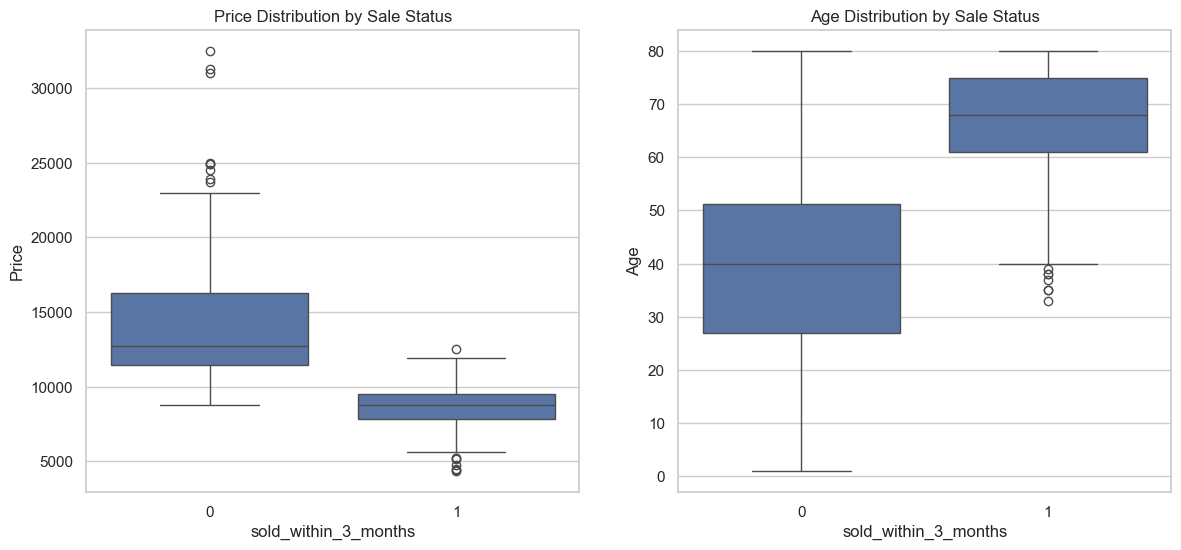

In [75]:
#TODO

# Plot the distribution of Price and Age 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Price
sns.boxplot(x='sold_within_3_months', y='Price', data=data_df, ax=axes[0])
axes[0].set_title('Price Distribution by Sale Status')

# Plot Age 
sns.boxplot(x='sold_within_3_months', y='Age', data=data_df, ax=axes[1])
axes[1].set_title('Age Distribution by Sale Status')


plt.show()


4. (17 pts) Try to come up with a model that improves the results both in the previous seciton but also your baseline model in 3.1. Make to sure to properly evaluate the model. No need to provide a visualization here but feel free to add any supporting evidence to your modeling.

Minimally (and for a high-grade) you should consider some form of regularization and proper cross-validation. 

Other things you can consider (in no particular order) are feature engineering, model robustness, hyperparameter tuning, ...

In [71]:
#TODO
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Ridge regularization
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_cv_score = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Ridge F1 Score (5-fold CV): {ridge_cv_score.mean():.4f}")

# Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_cv_score = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Lasso F1 Score (5-fold CV): {lasso_cv_score.mean():.4f}")



Ridge F1 Score (5-fold CV): 0.9377
Lasso F1 Score (5-fold CV): 0.9431


We can see the lasso experiemnt improved the F1 score by roughly 0,01. It is not such a big difference but when the accuracy is already high this is an option to improve it a bit.

## Part 4 The Aftermath (5 pts)

Machine learning models are often evaluated based on accuracy, precision and recall, but these metrics do not always capture fairness. Fairness is a broader concept that depends on the context of the dataset and the decisions influenced by the model.

For this last question, you are asked to reflect on what fairness means in the context of this problem. More specifically, identify potential fairness concerns (at least 2) and suggest how they could be measured or mitigated.
Explain why fairness matters (or doesn’t) in this specific context.

*Hint: Think of the whole pipeline of data science: data collection, modeling, evaluation and identify sources of where the model might be unfair.*


Your Response:

//**//